<a href="https://colab.research.google.com/github/financieras/ai/blob/main/perceptronOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron OR

## Perceptron OR con pesos aleatorios
Se generan pesos aleatorios hasta que el modelo es capaz de separ los puntos de la puerta lógica OR.

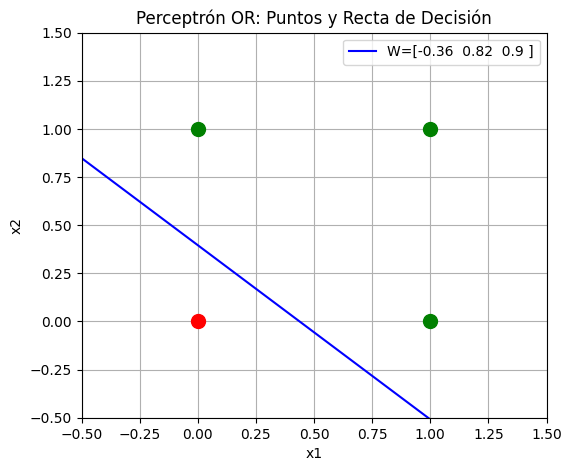

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()

# Función de activación escalón
def step_function(z):
    return 1 if z >= 0 else 0

# Función para encontrar pesos que resuelvan OR
def find_or_weights():
    # Datos de entrada y salida
    X = np.array([[1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])
    Y = np.array([0, 1, 1, 1])
    while True:
        # Inicialización de pesos y bias
        W = np.random.uniform(-1, 1, 3)  # Genera 3 números aleatorios entre -1 y 1

        # Cálculo de la salida (predicción)
        z = W @ X.T #z = X @ W    #z = np.dot(X, W)  # Producto punto
        y_pred = np.array([step_function(i) for i in z])

        # Si el bucle encuentra unos pesos adecuados
        if np.array_equal(y_pred, Y):
            return W

# Función para dibujar la recta
def plot_line(W, color):
    x = np.linspace(-0.5, 1.5, 100)
    y = (-W[0] - W[1]*x) / W[2] if W[2] != 0 else np.zeros_like(x)  # Evitar división por cero
    plt.plot(x, y, color, label=f'W={W.round(2)}')

# Configurar el gráfico
plt.figure(figsize=(6, 5))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptrón OR: Puntos y Recta de Decisión')
plt.grid(True)

# Dibujar los puntos OR
or_points = [(0,0), (0,1), (1,0), (1,1)]
colors = ['red', 'green', 'green', 'green']
for point, color in zip(or_points, colors):
    plt.scatter(point[0], point[1], c=color, s=100, zorder=5)

# Generar y una posible recta de separación
W = find_or_weights()
plot_line(W, color='blue')

plt.legend()
plt.show()

## Perceptron OR con entrenamiento
Se utiliza el algoritmo de descenso del gradiente para lograr unos pesos por entrenamiento del modelo que sean capaz de separ los puntos de la puerta lógica OR.

Estrictamente hablando, el código actual no implementa un descenso del gradiente estocástico, sino que está realizando una forma de descenso del gradiente por lote (o "batch gradient descent").

Para aclararlo mejor:

Descenso del Gradiente por Lote (Batch Gradient Descent):

En este código, se calcula el error acumulado de todos los ejemplos (las cuatro combinaciones de entradas) y se actualizan los pesos una sola vez en cada iteración, utilizando el gradiente de ese conjunto completo de datos.
Esto es correcto, pero para casos simples (como la puerta lógica OR) y en redes neuronales donde buscamos adaptabilidad rápida, el descenso del gradiente estocástico puede ser más eficiente.

Predicciones: [0. 1. 1. 1.]
Salidas esperadas: [0 1 1 1]
Número de iteraciones: 289
W: [-1.55366518  4.17790629  4.16565524]


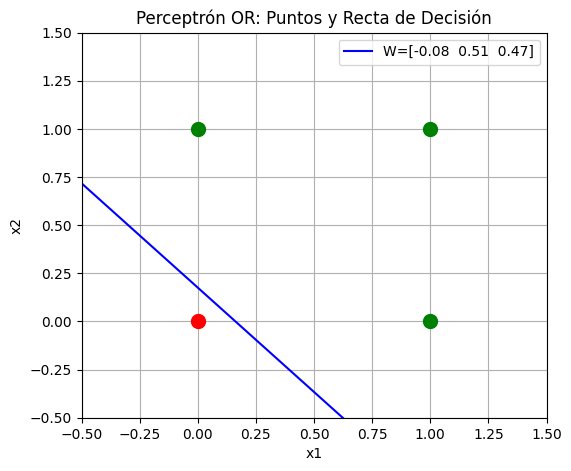

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()

# Función de activación sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Datos de entrada y salida (normalizados)
X = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])
Y = np.array([0, 1, 1, 1])

# Inicialización de pesos
W = np.random.uniform(-1, 1, 3)

# Tasa de aprendizaje
learning_rate = 0.1

# Número máximo de iteraciones
max_iter = 1000

# Entrenamiento
for i in range(max_iter):
    # Cálculo de la salida (predicción)
    z = np.dot(W, X.T)
    y_pred = sigmoid(z)

    # Cálculo del error
    error = Y - y_pred

    # Actualización de los pesos
    W += learning_rate * error @ X

    # Criterio de parada (error cuadrático medio)
    mse = np.mean(error**2)
    if mse < 0.01:
        break

# Evaluación del modelo
z = np.dot(W, X.T)
y_pred = np.round(sigmoid(z))  # Redondear a 0 o 1
print("Predicciones:", y_pred)
print("Salidas esperadas:", Y)
print("Número de iteraciones:", i+1)
print("W:", W)


# Función para dibujar la recta
def plot_line(W, color):
    x = np.linspace(-0.5, 1.5, 100)
    y = (-W[0] - W[1]*x) / W[2] if W[2] != 0 else np.zeros_like(x)  # Evitar división por cero
    plt.plot(x, y, color, label=f'W={W.round(2)}')

# Configurar el gráfico
plt.figure(figsize=(6, 5))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptrón OR: Puntos y Recta de Decisión')
plt.grid(True)

# Dibujar los puntos OR
or_points = [(0,0), (0,1), (1,0), (1,1)]
colors = ['red', 'green', 'green', 'green']
for point, color in zip(or_points, colors):
    plt.scatter(point[0], point[1], c=color, s=100, zorder=5)

# Generar y una posible recta de separación
W = find_or_weights()
plot_line(W, color='blue')

plt.legend()
plt.show()

## Descenso del Gradiente Estocástico

Descenso del Gradiente Estocástico (Stochastic Gradient Descent o SGD):

En este enfoque, los pesos se actualizan después de calcular el error para cada ejemplo individual, en lugar de calcularlo para todo el conjunto. Esto significa que dentro del bucle principal, recorreríamos cada entrada de X y Y individualmente y ajustaríamos los pesos inmediatamente según el error de ese único ejemplo.
Este método tiende a converger más rápido y es menos propenso a quedarse atrapado en mínimos locales, aunque puede ser un poco menos estable en cuanto a su error entre iteraciones.
Implementación en Código para SGD
Para implementar el descenso del gradiente estocástico, se debe modificar el bucle de entrenamiento para que procese cada muestra por separado, de la siguiente manera:

Predicciones: [0. 1. 1. 1.]
Salidas esperadas: [0 1 1 1]
Número de iteraciones: 10
Pesos finales W: [-0.29411482  1.38315833  1.21164637]


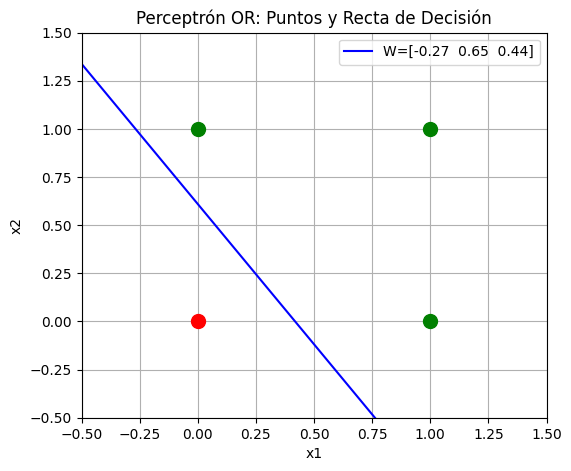

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()

# Función de activación sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Datos de entrada y salida (normalizados)
X = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])
Y = np.array([0, 1, 1, 1])

# Inicialización de pesos
W = np.random.uniform(-1, 1, 3)

# Tasa de aprendizaje
learning_rate = 0.1

# Número máximo de iteraciones
max_iter = 1000

# Entrenamiento con Descenso del Gradiente Estocástico
for i in range(max_iter):
    for x, y in zip(X, Y):  # Procesar cada muestra individualmente
        # Calcular la salida
        z = np.dot(W, x)
        y_pred = sigmoid(z)

        # Calcular el error
        error = y - y_pred

        # Actualizar los pesos
        W += learning_rate * error * x

    # Criterio de parada (error cuadrático medio)
    z = np.dot(W, X.T)
    y_pred = sigmoid(z)
    mse = np.mean(error ** 2)
    if mse < 0.01:
        break

# Evaluación del modelo
z = np.dot(W, X.T)
y_pred = np.round(sigmoid(z))  # Redondear a 0 o 1
print("Predicciones:", y_pred)
print("Salidas esperadas:", Y)
print("Número de iteraciones:", i+1)
print("Pesos finales W:", W)


# Función para dibujar la recta
def plot_line(W, color):
    x = np.linspace(-0.5, 1.5, 100)
    y = (-W[0] - W[1]*x) / W[2] if W[2] != 0 else np.zeros_like(x)  # Evitar división por cero
    plt.plot(x, y, color, label=f'W={W.round(2)}')

# Configurar el gráfico
plt.figure(figsize=(6, 5))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptrón OR: Puntos y Recta de Decisión')
plt.grid(True)

# Dibujar los puntos OR
or_points = [(0,0), (0,1), (1,0), (1,1)]
colors = ['red', 'green', 'green', 'green']
for point, color in zip(or_points, colors):
    plt.scatter(point[0], point[1], c=color, s=100, zorder=5)

# Generar y una posible recta de separación
W = find_or_weights()
plot_line(W, color='blue')

plt.legend()
plt.show()